## CRISPR-Cas Genotyper

#### User Inputs

In [1]:
from os import system,path
from Bio import SearchIO
from pandas import DataFrame
from numpy import zeros
from glob import glob
from os.path import join

fasta_directory = "data/assemblies/reps/assemblies/reps" # Directory with .fasta or .fna files
output_report = "data/hmm/Cas9Report.tsv"
outdir = "data/hmm/typingResults"
srcCodePath = "/mnt/research/germs/shane/transActRNA/scripts"
hmmDir = "data/hmm"

fastas = glob(join(fasta_directory,"*.fna"))
fastas += glob(join(fasta_directory,"*.fasta"))
len(fastas)

2155

In [16]:
from glob import glob
from os import chdir
chdir("data/hmm")
recs = glob("Cas1_Custom*.hmm")
chdir("../..")
print(recs)

['Cas1_Custom19.hmm', 'Cas1_Custom21.hmm', 'Cas1_Custom8.hmm', 'Cas1_Custom48.hmm', 'Cas1_Custom32.hmm', 'Cas1_Custom4.hmm', 'Cas1_Custom10.hmm', 'Cas1_Custom0.hmm', 'Cas1_Custom33.hmm', 'Cas1_Custom42.hmm', 'Cas1_Custom40.hmm', 'Cas1_Custom5.hmm', 'Cas1_Custom14.hmm', 'Cas1_Custom38.hmm', 'Cas1_Custom18.hmm', 'Cas1_Custom29.hmm', 'Cas1_Custom16.hmm', 'Cas1_Custom25.hmm', 'Cas1_Custom34.hmm', 'Cas1_Custom28.hmm', 'Cas1_Custom3.hmm', 'Cas1_Custom20.hmm', 'Cas1_Custom1.hmm', 'Cas1_Custom7.hmm', 'Cas1_Custom36.hmm', 'Cas1_Custom41.hmm', 'Cas1_Custom24.hmm', 'Cas1_Custom35.hmm', 'Cas1_Custom13.hmm', 'Cas1_Custom49.hmm', 'Cas1_Custom47.hmm', 'Cas1_Custom2.hmm', 'Cas1_Custom12.hmm', 'Cas1_Custom23.hmm', 'Cas1_Custom26.hmm', 'Cas1_Custom30.hmm', 'Cas1_Custom39.hmm', 'Cas1_Custom44.hmm', 'Cas1_Custom11.hmm', 'Cas1_Custom46.hmm', 'Cas1_Custom6.hmm', 'Cas1_Custom31.hmm', 'Cas1_Custom15.hmm', 'Cas1_Custom17.hmm', 'Cas1_Custom9.hmm', 'Cas1_Custom22.hmm', 'Cas1_Custom45.hmm', 'Cas1_Custom50.hmm', '

In [6]:
%%bash
pwd
ls data


/mnt/ufs18/rs-033/germs/shane/transActRNA
CCGeno.py
CopyStep2.ipynb
CRISPR-Cas_Genotyper.ipynb
data
docs
done.wav
FromScratchPredictions.ipynb
hpcStatus.sh
oldPioneer
papers
ProcessCRISPRs.ipynb
README.md
scripts
Step1-OrthoFinder.ipynb
Step2-KnownTracrUniverse.ipynb
Step3-TracrRNA_Predictions.ipynb
Step4-StructuralComparison.ipynb
Step5-EvolPresence.ipynb
Step6-SingleGuideSolutions.ipynb
Step6-TRACR_Compare.ipynb
StepX.ipynb
TRACR_Project_Stats.ipynb


In [17]:
cas9_subtyper = {"Cas1":["Cas1_2017-05-19.hmm","Cas1_0_I-II-III.hmm","Cas1_0_IA.hmm","Cas1_0_IE.hmm","Cas1_0_II.hmm","Cas1_0_I-II-III-V.hmm","Cas1_0_IC.hmm","Cas1_0_IF.hmm","Cas1_0_V.hmm"],
                 "Cas2":["Cas2_2017-05-19.hmm","Cas2_0_I-II-III.hmm","Cas2_0_IE.hmm","Cas2_0_I-II-III-V.hmm"],
                 "Csn2":["Csn2_0_IIA.hmm","Csn2_2017-05-19.hmm"],
                 "Cas4":["Cas4_2017-05-15.hmm","Cas4_0_IA.hmm","Cas4_0_I-II.hmm","Cas4_0_I-II-V.hmm","Cas4_0_V.hmm"]}
print(len(cas9_subtyper["Cas1"]))
cas9_subtyper["Cas1"]+=recs
print(len(cas9_subtyper["Cas1"]))

9
60


In [19]:
import time
orfCommand = "python %s/GetOrfs.py %s %s/%s.orfs 200 >/dev/null\n"
hmmSearchCommand = "hmmsearch --cpu 1 %s/%s %s/%s.orfs >%s/%s.hmmout\n"
count,runs = 0,0
for i,fname in enumerate(fastas):
    sampName = fname[fname.rfind("/")+1:]
#     if path.exists("%s/%s.orfs" % (outdir,sampName)):continue
#     print(i,"data/hmm/typingScripts/%s.sb" % (sampName))
    with open("data/hmm/typingScripts/%s.sb" % (sampName),'w') as fh:
        runs = 0
        fh.write("#!/bin/bash\n#SBATCH --nodes=1\n")
        #fh.write(orfCommand % (srcCodePath,fname,outdir,sampName))
        for gene in cas9_subtyper:
            for hmm in cas9_subtyper[gene]:
                if not path.exists(outdir+"/"+sampName+"_"+hmm.replace(".hmm","")+".hmmout"):
                    runs+=1
    #                 system(hmmSearchCommand % (hmmDir,hmm,outdir,sampName,outdir,sampName+"_"+hmm.replace(".hmm","")))
                    fh.write(hmmSearchCommand % (hmmDir,hmm,outdir,sampName,outdir,sampName+"_"+hmm.replace(".hmm","")))
    if runs>0:
        count+=1
        print("sbatch data/hmm/typingScripts/%s.sb" % (sampName))
        system("sbatch data/hmm/typingScripts/%s.sb" % (sampName))
    if i % 500 == 0 and i != 0:
        time.sleep(60)
count

sbatch data/hmm/typingScripts/1349.75.fna.sb
sbatch data/hmm/typingScripts/418702.3.fna.sb
sbatch data/hmm/typingScripts/1974027.3.fna.sb
sbatch data/hmm/typingScripts/1946553.3.fna.sb
sbatch data/hmm/typingScripts/1163302.3.fna.sb
sbatch data/hmm/typingScripts/2200892.3.fna.sb
sbatch data/hmm/typingScripts/1484053.3.fna.sb
sbatch data/hmm/typingScripts/1184267.3.fna.sb
sbatch data/hmm/typingScripts/655355.3.fna.sb
sbatch data/hmm/typingScripts/2052180.29.fna.sb
sbatch data/hmm/typingScripts/39770.6.fna.sb
sbatch data/hmm/typingScripts/194843.85.fna.sb
sbatch data/hmm/typingScripts/1699412.3.fna.sb
sbatch data/hmm/typingScripts/1293890.6.fna.sb
sbatch data/hmm/typingScripts/1950292.3.fna.sb
sbatch data/hmm/typingScripts/1564506.4.fna.sb
sbatch data/hmm/typingScripts/1408323.3.fna.sb
sbatch data/hmm/typingScripts/1871037.68.fna.sb
sbatch data/hmm/typingScripts/2293151.3.fna.sb
1000
sbatch data/hmm/typingScripts/395936.12.fna.sb
sbatch data/hmm/typingScripts/765821.6.fna.sb
sbatch data/h

109905

In [20]:
samples = []
for i,fname in enumerate(fastas): samples.append(fname[fname.rfind("/")+1:].replace(".fna","").replace(".fasta",""))
sampleTypes = DataFrame(zeros((len(samples),4)),index=samples,columns=cas9_subtyper.keys())

for i,sname in enumerate(samples):
    for gene in cas9_subtyper:
        for hmm in cas9_subtyper[gene]:
            fname = fastas[i][fastas[i].rfind('/')+1:]
            try:qresult = SearchIO.read('data/hmm/typingResults/%s_%sout' % (fname,hmm), 'hmmer3-text')
            except:
                print('data/hmm/typingResults/%s_%sout' % (fname,hmm))
                continue
            sampleTypes.at[sname,gene] = int(len(qresult.hits) > 0)
            if sampleTypes.at[sname,gene]>0: break
         

In [5]:
typeAs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 1) & (sampleTypes.Cas4 == 0)) ]
print("II-As:",len(typeAs))
typeBs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 0) & (sampleTypes.Cas4 == 1)) ]
print("II-Bs:",len(typeBs))
typeCs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 0) & (sampleTypes.Cas4 == 0)) ]
print("II-Cs:",len(typeCs))

covered = set(typeAs.index).union(typeBs.index).union(typeCs.index)
len(covered)

II-As: 14
II-Bs: 305
II-Cs: 54


373

In [5]:
typeAs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 1) & (sampleTypes.Cas4 == 0)) ]
print("II-As:",len(typeAs))
typeBs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 0) & (sampleTypes.Cas4 == 1)) ]
print("II-Bs:",len(typeBs))
typeCs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 0) & (sampleTypes.Cas4 == 0)) ]
print("II-Cs:",len(typeCs))

covered = set(typeAs.index).union(typeBs.index).union(typeCs.index)
len(covered)

II-As: 2
II-Bs: 1204
II-Cs: 6


1212

In [21]:
typeAs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 1) & (sampleTypes.Cas4 == 0)) ]
print("II-As:",len(typeAs))
typeBs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 0) & (sampleTypes.Cas4 == 1)) ]
print("II-Bs:",len(typeBs))
typeCs = sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 0) & (sampleTypes.Cas4 == 0)) ]
print("II-Cs:",len(typeCs))

covered = set(typeAs.index).union(typeBs.index).union(typeCs.index)
len(covered)

II-As: 2
II-Bs: 1234
II-Cs: 9


1245

In [22]:
len(sampleTypes[sampleTypes.Csn2 == 1])

816

In [6]:
len(sampleTypes[((sampleTypes.Cas1 == 0) & (sampleTypes.Cas2 == 0) & (sampleTypes.Csn2 == 0) & (sampleTypes.Cas4 == 0)) ])
sampleTypes.sum()

Cas1    2094.0
Cas2    2041.0
Csn2     816.0
Cas4    2140.0
dtype: float64

In [8]:
sampleTypes[((sampleTypes.Cas1 == 1) & (sampleTypes.Cas2 == 1) & (sampleTypes.Csn2 == 1) & (sampleTypes.Cas4 == 1)) ]  

,Cas1,Cas2,Csn2,Cas4
1349.75,1.0,1.0,1.0,1.0
1163302.3,1.0,1.0,1.0,1.0
39770.6,1.0,1.0,1.0,1.0
1950292.3,1.0,1.0,1.0,1.0
1408323.3,1.0,1.0,1.0,1.0
...,...,...,...,...
GCF_001748065.1,1.0,1.0,1.0,1.0
GCF_003934435.1,1.0,1.0,1.0,1.0
GCA_000163895.2,1.0,1.0,1.0,1.0
GCA_900549165.1,1.0,1.0,1.0,1.0


In [14]:
from venn import venn
sDict =sampleTypes.to_dict()
cas1s = set(sampleTypes[sampleTypes.Cas1 == 1].index)
cas2s = set(sampleTypes[sampleTypes.Cas2 == 1].index)
csn2s = set(sampleTypes[sampleTypes.Csn2 == 1].index)
cas4s = set(sampleTypes[sampleTypes.Cas4 == 1].index)

venMapper = {'Cas1':cas1s, 'Cas2':cas2s, 'Csn2':csn2s, 'Cas4':cas4s}

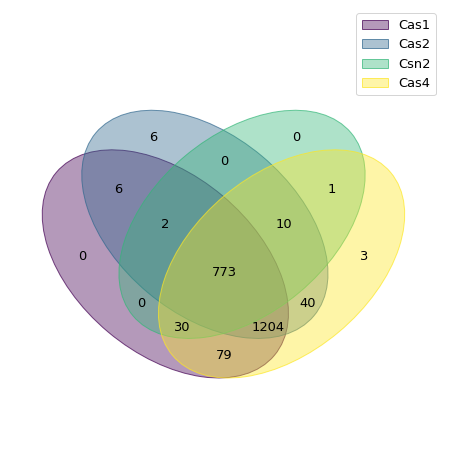

In [17]:
vd = venn(venMapper)
vd;

In [24]:
%%bash
ls data


alignments
annotations
assemblies
blastDBs
blastout
clusters
conseqs4
conseqs5
FindTracrsLog.txt
GCA_001657685.1.fasta.tar.gz
GCF_004135525.1.pcrout
GCF_900169615.1.pcrout
GCF_900516295.1.pcrout
hmm
images
InfernalResults.py
LaunchStructureSearch.sh
logs
old
pickles
proteins
__pycache__
remaining
Rho.py
sequences
structures
tables
Test.fa
TestFolds.fa
TestsgRNA.fa
test.tzt
tmp
totalJobs
trees


In [25]:
dir(vd)
fig = vd.figure
dir(fig)
fig.savefig("data/images/CasTyping.png")

In [18]:
dir(vd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [ ]:
from CCGeno import *

In [ ]:
if [ ! -f hmm/results/GCA_006063855.1.hmmout ]; then
    python %s/GetOrfs.py %s/%s %s/%s 673 >/dev/null
    hmmsearch hmm/Cas9.hmm sequences/orfs/GCA_006063855.1.orfs >hmm/results/GCA_006063855.1.hmmout
    hmmsize=$(wc -l <"hmm/results/GCA_006063855.1.hmmout") 
    if [ $hmmsize -le 40 ]; then 
        rm sequences/orfs/GCA_006063855.1.orfs 
    fi
fi

In [10]:
fna_s

['data/assemblies/reps/GCF_001921845.1.fasta.tar.gz',
 'data/assemblies/reps/GCF_005116475.1.fasta.tar.gz',
 'data/assemblies/reps/GCA_002440075.1.fasta.tar.gz',
 'data/assemblies/reps/1909294.911.fna.tar.gz',
 'data/assemblies/reps/1948674.3.fna.tar.gz',
 'data/assemblies/reps/GCA_002394745.1.fasta.tar.gz',
 'data/assemblies/reps/1335.80.fna.tar.gz',
 'data/assemblies/reps/GCF_003075435.1.fasta.tar.gz',
 'data/assemblies/reps/GCA_900104225.1.fasta.tar.gz',
 'data/assemblies/reps/1408323.3.fna.tar.gz',
 'data/assemblies/reps/GCA_003664185.1.fasta.tar.gz',
 'data/assemblies/reps/GCF_003602765.1.fasta.tar.gz',
 'data/assemblies/reps/GCA_000800295.1.fasta.tar.gz',
 'data/assemblies/reps/2044591.3.fna.tar.gz',
 'data/assemblies/reps/GCA_001417715.1.fasta.tar.gz',
 'data/assemblies/reps/GCF_001975685.1.fasta.tar.gz',
 'data/assemblies/reps/GCA_000745315.1.fasta.tar.gz',
 'data/assemblies/reps/999415.6.fna.tar.gz',
 'data/assemblies/reps/544580.43.fna.tar.gz',
 'data/assemblies/reps/GCA_0009